In [45]:
# Import necessary libraries
import pandas as pd
import numpy as np
import db_utils, sqlalchemy
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import seaborn as sns
from scipy.stats import fisher_exact
from scipy import stats
import matplotlib.pyplot as plt
import math
import os
import gzip
import re
import glob
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import math
import time
from collections import Counter
plt.rcParams['axes.spines.top'] = False # remove top spine
plt.rcParams['axes.spines.right'] = False # remove right spine
plt.rcParams['pdf.fonttype'] = 42 # Set the fonttype to export fonts as font files
plt.rcParams['font.family'] = 'Arial'
global_fontsize = 12
figsize = (3,3)
legend_fontsize = 8
#bbox_to_anchor =(1.0, 1.0)
import requests
save_path= '/Users/johgeist/Documents/AG_Luck/3did_project/revisions/revision_figures/'

In [46]:
# Load the results of the R Gene Ontology enrichment analysis that were preprocessed in python
df= pd.read_csv('/Users/johgeist/Documents/AG_Luck/3did_project/revisions/GO_term_enrichment/cluster_analysis_in_R_v25/1CLUSTER_ndd_background_merged.csv', delimiter = '\t')

In [47]:
df

,ID,term,GeneRatio,BgRatio,pvalue,adj_pval,qvalue,genes,count,category
0,GO:0140535,intracellular protein-containing complex,170/1112,444/8546,6.544370e-44,3.265641e-41,2.039088e-41,DBF4/CUL2/TBPL1/UBE2D2/CBX8/GTF2A1/CAMK2A/CCNH...,170,CC
1,GO:1990234,transferase complex,152/1112,450/8546,9.199348e-32,2.295237e-29,1.433162e-29,CUL2/TBPL1/UBE2D2/CBX8/GTF2A1/CCNH/GLMN/FBXO4/...,152,CC
2,GO:0090575,RNA polymerase II transcription regulator complex,71/1112,145/8546,3.516903e-26,5.849783e-24,3.652644e-24,TBPL1/ATF5/GTF2A1/LMO4/CCNH/E2F4/RUNX3/NR1H3/G...,71,CC
3,GO:0005667,transcription regulator complex,103/1112,282/8546,1.314476e-24,1.639809e-22,1.023908e-22,TBPL1/ATF5/GTF2A1/MYOD1/LMO4/RELA/CCNH/FIGLA/C...,103,CC
4,GO:0061695,"transferase complex, transferring phosphorus-c...",64/1112,146/8546,1.871352e-20,1.867609e-18,1.166148e-18,TBPL1/GTF2A1/CCNH/POLR1D/PIK3R4/GTF2H5/PARD6A/...,64,CC
...,...,...,...,...,...,...,...,...,...,...
957,GO:0004721,phosphoprotein phosphatase activity,19/1122,85/8825,9.208963e-03,3.690407e-02,2.620875e-02,DUSP4/UBASH3B/TNS2/PPP1CA/PPP2CA/PPM1K/DUSP16/...,19,MF
958,GO:0016504,peptidase activator activity,8/1122,25/8825,9.808477e-03,3.901754e-02,2.770971e-02,ADRM1/PSMD14/PSME2/PSENEN/BAD/VCP/FBLN1/PSME1,8,MF
959,GO:0140416,transcription regulator inhibitor activity,5/1122,12/8825,1.205968e-02,4.762253e-02,3.382085e-02,TCF23/ID1/ID2/ID3/NR0B2,5,MF
960,GO:0001098,basal transcription machinery binding,9/1122,31/8825,1.247656e-02,4.855984e-02,3.448651e-02,GTF2A1/RUVBL1/GTF2A2/RUVBL2/ESRRB/LEO1/TCF4/DR...,9,MF


In [49]:
# change GeneRatio datatype from '10/100' to decimal
ratio_parts = df['GeneRatio'].str.split('/')
df['GeneRatio'] = ratio_parts.apply(lambda x: int(x[0]) / int(x[1]))

In [103]:
# Modify GO 'term' column for plotting later on (insert new line characyers every 45 letters!)

# Insert newline characters if description is long
descrs_new = []
for descr in df['term'].tolist():
    if len(descr) > 15:  # Example threshold for line length
        descr_new = '\n'.join(descr[i:i+30] for i in range(0, len(descr), 15))
    else:
        descr_new= descr
    descrs_new.append(descr_new)
    
# Insert newline characters if description is long
descrs_new = []
for description in df['term'].tolist():
    if len(description) > 45:  # Example threshold for line length
        words = description.split()
        lines = []
        current_line = ''
        for word in words:
            if len(current_line) + len(word) > 45:
                lines.append(current_line)
                current_line = word
            else:
                if current_line:
                    current_line += ' '
                current_line += word
        lines.append(current_line)  # Append the last line
        description = '\n'.join(lines)
    descrs_new.append(description)

In [104]:
df['term']= descrs_new

['intracellular\nprotein-containing complex',
 'transferase complex',
 'RNA polymerase II transcription regulator\ncomplex',
 'transcription regulator complex',
 'transferase complex, transferring\nphosphorus-containing groups',
 'protein kinase complex',
 'intermediate filament',
 'intermediate filament\ncytoskeleton',
 'ubiquitin ligase complex',
 'serine/threonine protein kinase\ncomplex',
 'endopeptidase complex',
 'proteasome complex',
 'peptidase complex',
 'cullin-RING ubiquitin ligase\ncomplex',
 'polymeric cytoskeletal fiber',
 'transport vesicle',
 'SCF ubiquitin ligase complex',
 'SNARE complex',
 'septin cytoskeleton',
 'keratin filament',
 'SMN-Sm protein complex',
 'cyclin-dependent protein kinase holoenzyme\ncomplex',
 'septin ring',
 'septin complex',
 'exocytic vesicle',
 'Sm-like protein family complex',
 'presynapse',
 'hemoglobin complex',
 'synaptic vesicle',
 'P-body',
 'focal adhesion',
 'U4/U6 x U5 tri-snRNP complex',
 'spliceosomal tri-snRNP complex',
 'proteas

In [142]:
# Split df into 4 subsets realting to the 4 different GO categories (molecular function, biological process,
# cellular compartment, disease ontology)
df_MF = df[df['category']== 'MF'].sort_values(by='count', ascending= True)
df_BP = df[df['category']== 'BP'].sort_values(by='count', ascending= True)
df_CC = df[df['category']== 'CC'].sort_values(by='count', ascending= True)
df_DO = df[df['category']== 'DO'].sort_values(by='count', ascending= True)

In [158]:
# Extract 10 most abundant GO terms from every category and sort by descending GeneRatio  
df_MF_top10 = df_MF.nlargest(10, 'count').sort_values(by='GeneRatio', ascending= False)
df_BP_top10 = df_BP.nlargest(10, 'count').sort_values(by='GeneRatio', ascending= False)
df_CC_top10 = df_CC.nlargest(10, 'count').sort_values(by='GeneRatio', ascending= False)
df_DO_top10 = df_DO.nlargest(10, 'count').sort_values(by='GeneRatio', ascending= False)

In [188]:
df_MF_top10['log_adj_pval']= -np.log10(df_MF_top10['adj_pval'])
df_BP_top10['log_adj_pval']= -np.log10(df_BP_top10['adj_pval'])
df_CC_top10['log_adj_pval']= -np.log10(df_CC_top10['adj_pval'])
df_DO_top10['log_adj_pval']= -np.log10(df_DO_top10['adj_pval'])

In [190]:
df_MF_top10

,ID,term,GeneRatio,BgRatio,pvalue,adj_pval,qvalue,genes,count,category,log_adj_pval
839,GO:0019904,protein domain specific binding,0.100713,414/8825,2.479954e-16,7.892090e-15,5.604850e-15,RAB27B/CALM1/TRA2B/CDC42/RELA/TP53BP2/PTK2/TNN...,113,MF,14.102808
840,GO:0019900,kinase binding,0.097148,402/8825,1.463243e-15,4.397858e-14,3.123296e-14,RHOH/CALM1/ATF5/CDC42/RELA/PTK2/TNNI3/ARHGEF16...,109,MF,13.356759
834,GO:0016462,pyrophosphatase activity,0.090018,340/8825,2.116213e-17,9.540592e-16,6.775593e-16,RHOH/RAB25/RAB27B/RAB3B/CDC42/SEPTIN9/SEPTIN7/...,101,MF,15.020425
835,GO:0016817,"hydrolase activity, acting on\nacid anhydrides",0.090018,341/8825,2.650280e-17,1.024144e-15,7.273324e-16,RHOH/RAB25/RAB27B/RAB3B/CDC42/SEPTIN9/SEPTIN7/...,101,MF,14.989639
836,GO:0016818,"hydrolase activity, acting on acid anhydrides,...",0.090018,341/8825,2.650280e-17,1.024144e-15,7.273324e-16,RHOH/RAB25/RAB27B/RAB3B/CDC42/SEPTIN9/SEPTIN7/...,101,MF,14.989639
828,GO:0017111,nucleoside-triphosphatase\nactivity,0.090018,309/8825,1.013412e-20,9.137597e-19,6.489392e-19,RHOH/RAB25/RAB27B/RAB3B/CDC42/SEPTIN9/SEPTIN7/...,101,MF,18.039168
845,GO:0016772,"transferase activity, transferring\nphosphorus...",0.090018,387/8825,2.459791e-13,5.785856e-12,4.109033e-12,STK16/CDK8/PAK6/CAMK2A/PTK2/DYRK4/RIPK1/CSNK2A...,101,MF,11.237632
844,GO:0019901,protein kinase binding,0.086453,356/8825,4.325366e-14,1.063647e-12,7.553870e-13,RHOH/CALM1/CDC42/RELA/PTK2/TNNI3/ARHGEF16/TRIB...,97,MF,11.973203
846,GO:0008134,transcription factor binding,0.082888,348/8825,5.231258e-13,1.179213e-11,8.374601e-12,CRTC1/TCF23/GTF2A1/MYOD1/LMO4/RELA/FIGLA/TP53B...,93,MF,10.928408
842,GO:0016301,kinase activity,0.081105,310/8825,2.053725e-15,5.555327e-14,3.945314e-14,STK16/CDK8/PAK6/CAMK2A/PTK2/DYRK4/RIPK1/CSNK2A...,91,MF,13.255290


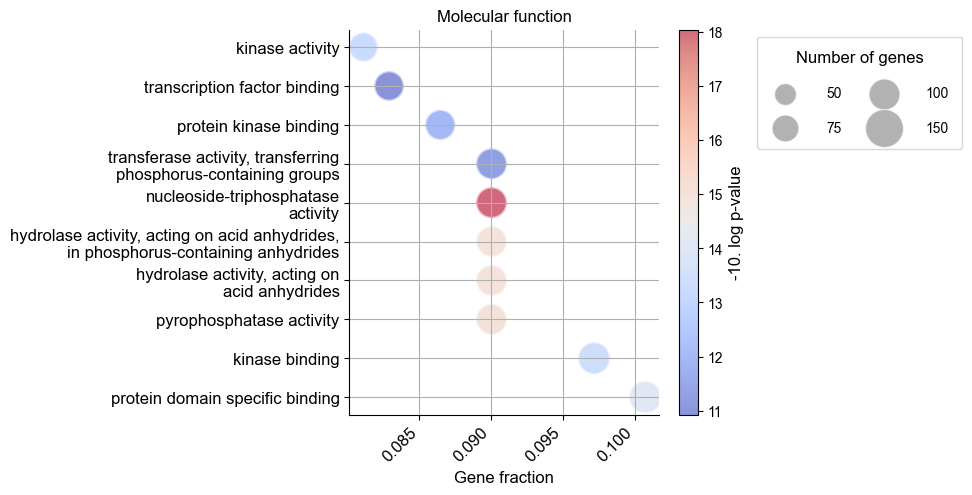

In [217]:
# Bubble plot for molecular function category
plt.figure(figsize=(5, 5))
bubble_plot = plt.scatter(x=df_MF_top10['GeneRatio'], y=df_MF_top10['term'], 
                          s=df_MF_top10['count']*5,  # Adjust the size for better visibility
                          c=df_MF_top10['log_adj_pval'], cmap='coolwarm', alpha=0.6, edgecolors="w", linewidth=2)
plt.xlabel('Gene fraction', fontsize= global_fontsize)
#plt.ylabel('ID')
plt.title('Molecular function', fontsize= global_fontsize)
plt.xticks(fontname="Arial", fontsize= global_fontsize)
plt.yticks(fontname="Arial", fontsize= global_fontsize)
#plt.colorbar(bubble_plot, label='p-value')

# Add colorbar
cbar = plt.colorbar(bubble_plot)
cbar.set_label('-10. log p-value', fontsize=global_fontsize)

# Set custom colorbar ticks and labels for log-transformed values
log_ticks = [11, 12, 13, 14, 15, 16, 17, 18]
cbar.set_ticks(log_ticks)
cbar.set_ticklabels(log_ticks)

# Create a legend for the bubble sizes
sizes = [50, 75, 100, 150]
#size_labels = [f'Gene number = {size}' for size in sizes]
dummy_scatter = [plt.scatter([], [], s=size*5, color='gray', alpha=0.6, edgecolors="w") for size in sizes]

# Adjust legend properties to prevent overlap
plt.legend(dummy_scatter, sizes, loc='upper right', title= 'Number of genes', fontsize=global_fontsize-2, title_fontsize=global_fontsize,
           handletextpad=2, borderpad=1, labelspacing=1.5, bbox_to_anchor= (2,1), ncol=2)

plt.xticks(rotation=45, ha='right')
plt.grid(True)

#plt.savefig(f'{save_path}GO_term_enrichment_MF.pdf', transparent=True, bbox_inches='tight')
plt.show()

In [206]:
df_BP_top10

,ID,term,GeneRatio,BgRatio,pvalue,adj_pval,qvalue,genes,count,category,log_adj_pval
223,GO:0044257,cellular protein catabolic\nprocess,0.139344,463/8108,7.623360e-29,4.454220e-26,3.478086e-26,CUL2/GABARAPL2/HERPUD1/UBE2D2/UBXN1/RYBP/PTK2/...,153,BP,25.351228
220,GO:0051603,proteolysis involved in cellular protein\ncata...,0.137523,433/8108,2.070274e-31,1.996613e-28,1.559059e-28,CUL2/GABARAPL2/HERPUD1/UBE2D2/UBXN1/RYBP/PTK2/...,151,BP,27.699706
222,GO:0043632,modification-dependent macromolecule catabolic...,0.126594,381/8108,3.008713e-31,2.050939e-28,1.601480e-28,CUL2/HERPUD1/UBE2D2/UBXN1/RYBP/PTK2/RNF111/NSF...,139,BP,27.688047
221,GO:0019941,modification-dependent protein catabolic\nprocess,0.125683,376/8108,2.440847e-31,1.996613e-28,1.559059e-28,CUL2/HERPUD1/UBE2D2/UBXN1/RYBP/PTK2/RNF111/NSF...,138,BP,27.699706
224,GO:0006511,ubiquitin-dependent protein\ncatabolic process,0.120219,369/8108,1.111400e-28,5.682034e-26,4.436827e-26,CUL2/HERPUD1/UBE2D2/UBXN1/RYBP/PTK2/RNF111/NSF...,132,BP,25.245496
228,GO:0016567,protein ubiquitination,0.118397,480/8108,3.658746e-16,1.247022e-13,9.737398e-14,CUL2/HERPUD1/UBE2D2/CBX8/UBXN1/RYBP/CDC42/RNF1...,130,BP,12.904126
226,GO:0097435,supramolecular fiber\norganization,0.112022,399/8108,2.852497e-20,1.166671e-17,9.109975e-18,RHOH/BFSP2/KRT20/CDC42/KRT38/KRT83/KRT17/KRT4/...,123,BP,16.933051
247,GO:0031329,regulation of cellular\ncatabolic process,0.101093,468/8108,5.921973e-10,7.813184e-08,6.100939e-08,GABARAPL2/HERPUD1/UBXN1/RYBP/PTK2/PCID2/VPS26A...,111,BP,7.107172
240,GO:0000278,mitotic cell cycle,0.100182,444/8108,4.335641e-11,7.388655e-09,5.769445e-09,DBF4/CUL2/CALM1/UNC119/CDC42/CAMK2A/CCNH/PCID2...,110,BP,8.131435
242,GO:0051338,regulation of transferase\nactivity,0.099271,447/8108,1.498067e-10,2.356575e-08,1.840136e-08,DBF4/CALM1/UNC119/FCGR1A/CDC42/LMO4/CCNH/PTK2/...,109,BP,7.627719


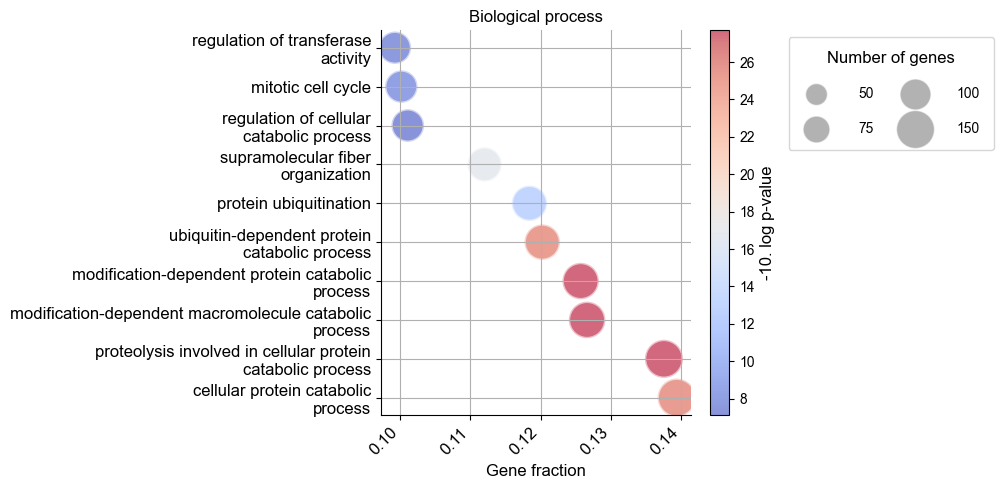

In [218]:
# Bubble plot for biological process category
plt.figure(figsize=(5, 5))
bubble_plot = plt.scatter(x=df_BP_top10['GeneRatio'], y=df_BP_top10['term'], 
                          s=df_BP_top10['count']*5,  # Adjust the size for better visibility
                          c=df_BP_top10['log_adj_pval'], cmap='coolwarm', alpha=0.6, edgecolors="w", linewidth=2)
plt.xlabel('Gene fraction', fontsize= global_fontsize)
#plt.ylabel('ID')
plt.title('Biological process', fontsize= global_fontsize)
plt.xticks(fontname="Arial", fontsize= global_fontsize)
plt.yticks(fontname="Arial", fontsize= global_fontsize)

# Add colorbar
cbar = plt.colorbar(bubble_plot)
cbar.set_label('-10. log p-value', fontsize=global_fontsize)

# Set custom colorbar ticks and labels for log-transformed values
log_ticks = [8, 10, 12, 14, 16, 18, 20, 22, 24, 26]
cbar.set_ticks(log_ticks)
cbar.set_ticklabels(log_ticks)

# Create a legend for the bubble sizes
sizes = [50, 75, 100, 150]
#size_labels = [f'Gene number = {size}' for size in sizes]
dummy_scatter = [plt.scatter([], [], s=size*5, color='gray', alpha=0.6, edgecolors="w") for size in sizes]

# Adjust legend properties to prevent overlap
plt.legend(dummy_scatter, sizes, loc='upper right', title= 'Number of genes', fontsize=global_fontsize-2, title_fontsize=global_fontsize,
           handletextpad=2, borderpad=1, labelspacing=1.5, bbox_to_anchor= (2,1), ncol=2)

plt.xticks(rotation=45, ha='right')
plt.grid(True)
# plt.savefig(f'{save_path}GO_term_enrichment_BP.pdf', transparent=True, bbox_inches='tight')
# plt.show()

In [193]:
df_CC_top10

,ID,term,GeneRatio,BgRatio,pvalue,adj_pval,qvalue,genes,count,category,log_adj_pval
0,GO:0140535,intracellular\nprotein-containing complex,0.152878,444/8546,6.544370e-44,3.265641e-41,2.039088e-41,DBF4/CUL2/TBPL1/UBE2D2/CBX8/GTF2A1/CAMK2A/CCNH...,170,CC,40.486032
1,GO:1990234,transferase complex,0.136691,450/8546,9.199348e-32,2.295237e-29,1.433162e-29,CUL2/TBPL1/UBE2D2/CBX8/GTF2A1/CCNH/GLMN/FBXO4/...,152,CC,28.639172
14,GO:0099513,polymeric cytoskeletal fiber,0.094424,438/8546,9.600449e-11,3.193749e-09,1.994198e-09,BFSP2/CALM1/KRT20/KRT38/SEPTIN9/KRT24/KRT83/KR...,105,CC,8.495699
3,GO:0005667,transcription regulator complex,0.092626,282/8546,1.314476e-24,1.639809e-22,1.023908e-22,TBPL1/ATF5/GTF2A1/MYOD1/LMO4/RELA/CCNH/FIGLA/C...,103,CC,21.785207
62,GO:0005815,microtubule organizing center,0.079137,450/8546,3.844188e-05,3.044841e-04,1.901219e-04,CALM1/ATF5/UNC119/CDC42/PTK2/DCTN4/KATNAL1/MAD...,88,CC,3.516435
48,GO:0070161,anchoring junction,0.076439,418/8546,1.151968e-05,1.173127e-04,7.325083e-05,CDC42/PTK2/KRAS/DCTN4/PLEKHG5/MAPRE2/PARD6A/TN...,85,CC,3.930655
55,GO:0048471,perinuclear region of cytoplasm,0.070144,383/8546,2.517940e-05,2.243664e-04,1.400959e-04,STK16/SEC23A/BUD23/VPS33B/RAB3B/SEPTIN9/TP53BP...,78,CC,3.649042
139,GO:0030141,secretory granule,0.065647,423/8546,6.096050e-03,2.172806e-02,1.356715e-02,RAB27B/COPB1/VPS33B/VAMP1/S100A9/CDC42/SRP14/K...,73,CC,1.662979
2,GO:0090575,RNA polymerase II transcription regulator\ncom...,0.063849,145/8546,3.516903e-26,5.849783e-24,3.652644e-24,TBPL1/ATF5/GTF2A1/LMO4/CCNH/E2F4/RUNX3/NR1H3/G...,71,CC,23.232860
119,GO:1990904,ribonucleoprotein complex,0.061151,381/8546,3.565549e-03,1.482674e-02,9.257917e-03,LTV1/TRA2B/GPKOW/GEMIN2/RPP14/SNRPA1/SRP14/RUV...,68,CC,1.828954


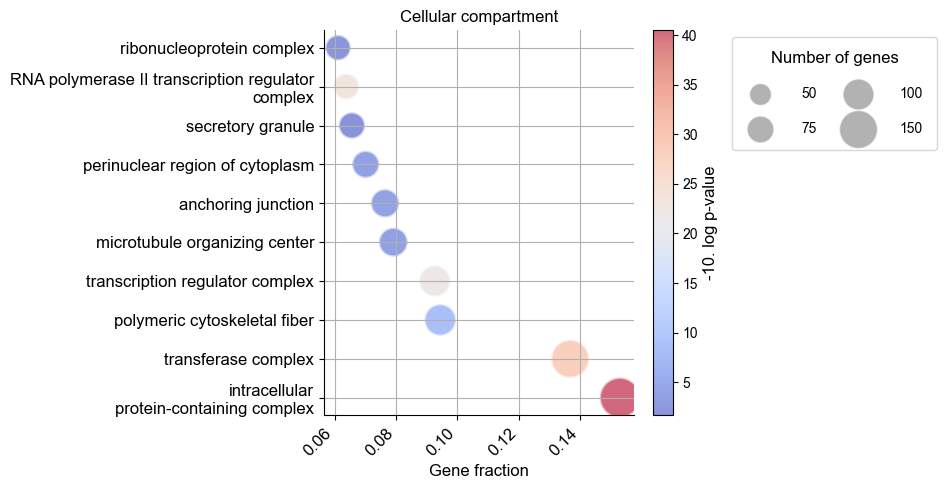

In [219]:
# Bubble plot for cellular compartment category
plt.figure(figsize=(5, 5))
bubble_plot = plt.scatter(x=df_CC_top10['GeneRatio'], y=df_CC_top10['term'], 
                          s=df_CC_top10['count']*5,  # Adjust the size for better visibility
                          c=df_CC_top10['log_adj_pval'], cmap='coolwarm', alpha=0.6, edgecolors="w", linewidth=2)
plt.xlabel('Gene fraction', fontsize= global_fontsize)
#plt.ylabel('ID')
plt.title('Cellular compartment', fontsize= global_fontsize)
plt.xticks(fontname="Arial", fontsize= global_fontsize)
plt.yticks(fontname="Arial", fontsize= global_fontsize)

# Add colorbar
cbar = plt.colorbar(bubble_plot)
cbar.set_label('-10. log p-value', fontsize=global_fontsize)

# Set custom colorbar ticks and labels for log-transformed values
log_ticks = [5, 10, 15, 20, 25, 30, 35, 40]
cbar.set_ticks(log_ticks)
cbar.set_ticklabels(log_ticks)

# Create a legend for the bubble sizes
sizes = [50, 75, 100, 150]
#size_labels = [f'Gene number = {size}' for size in sizes]
dummy_scatter = [plt.scatter([], [], s=size*5, color='gray', alpha=0.6, edgecolors="w") for size in sizes]

# Adjust legend properties to prevent overlap
plt.legend(dummy_scatter, sizes, loc='upper right', title= 'Number of genes', fontsize=global_fontsize-2, title_fontsize=global_fontsize,
           handletextpad=2, borderpad=1, labelspacing=1.5, bbox_to_anchor= (2,1), ncol=2)

plt.xticks(rotation=45, ha='right')
plt.grid(True)
# plt.savefig(f'{save_path}GO_term_enrichment_CC.pdf', transparent=True, bbox_inches='tight')
# plt.show()

In [212]:
df_DO_top10

,ID,term,GeneRatio,BgRatio,pvalue,adj_pval,qvalue,genes,count,category,log_adj_pval
166,DOID:3571,liver cancer,0.181818,450/3585,0.000014,0.001328,0.001102,ATF5/CDC42/TP53BP2/PTK2/KRAS/BCL2L2/RASSF5/MAD...,104,DO,2.876654
169,DOID:684,hepatocellular carcinoma,0.180070,447/3585,0.000018,0.001328,0.001102,ATF5/CDC42/TP53BP2/PTK2/KRAS/BCL2L2/RASSF5/MAD...,103,DO,2.876654
170,DOID:686,liver carcinoma,0.180070,447/3585,0.000018,0.001328,0.001102,ATF5/CDC42/TP53BP2/PTK2/KRAS/BCL2L2/RASSF5/MAD...,103,DO,2.876654
165,DOID:305,carcinoma,0.176573,433/3585,0.000012,0.001328,0.001102,KRT20/S100A9/CDC42/CAMK2A/LMO4/RELA/GEMIN2/PTK...,101,DO,2.876654
168,DOID:0050117,disease by infectious agent,0.173077,425/3585,0.000017,0.001328,0.001102,UNC119/VPS33B/FCGR1A/RELA/CCNH/KRAS/CSNK2A1/KR...,99,DO,2.876654
167,DOID:1749,squamous cell carcinoma,0.155594,371/3585,0.000014,0.001328,0.001102,KRT20/S100A9/CDC42/CAMK2A/LMO4/RELA/GEMIN2/PTK...,89,DO,2.876654
171,DOID:934,viral infectious disease,0.145105,346/3585,0.000029,0.001947,0.001614,UNC119/RELA/CCNH/KRAS/CSNK2A1/KRT1/KPNA1/LMNB1...,83,DO,2.710735
197,DOID:193,reproductive organ cancer,0.143357,377/3585,0.001068,0.021321,0.017683,S100A9/PAK6/CAMK2A/RELA/PTK2/KRAS/RUNX3/NR1H3/...,82,DO,1.671200
177,DOID:0050615,respiratory system cancer,0.127622,301/3585,0.000063,0.002668,0.002213,KRT20/S100A9/CDC42/RELA/CCNH/PTK2/KRAS/RASSF5/...,73,DO,2.573841
209,DOID:1909,melanoma,0.127622,339/3585,0.002712,0.038434,0.031876,DBF4/S100A1/CDK8/CDC42/RELA/PTK2/KRAS/RUNX3/BC...,73,DO,1.415289


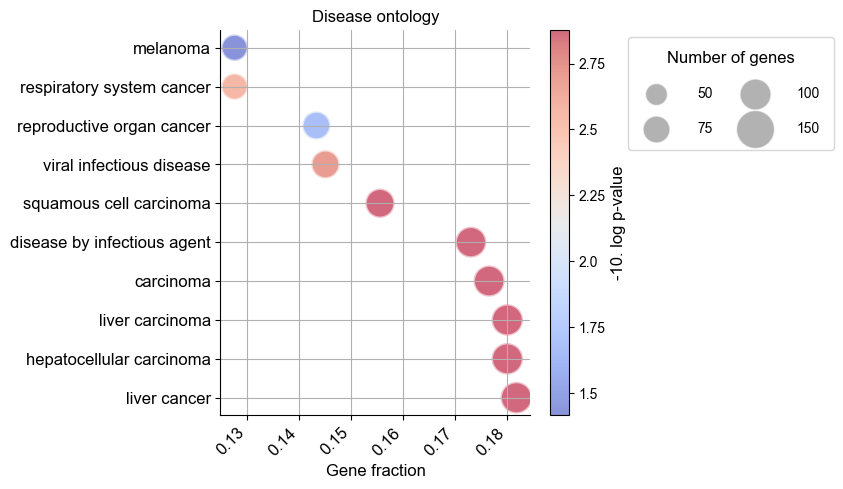

In [220]:
# Bubble plot for disease ontology category
plt.figure(figsize=(5, 5))
bubble_plot = plt.scatter(x=df_DO_top10['GeneRatio'], y=df_DO_top10['term'], 
                          s=df_DO_top10['count']*5,  # Adjust the size for better visibility
                          c=df_DO_top10['log_adj_pval'], cmap='coolwarm', alpha=0.6, edgecolors="w", linewidth=2)
plt.xlabel('Gene fraction', fontsize= global_fontsize)
#plt.ylabel('ID')
plt.title('Disease ontology', fontsize= global_fontsize)
plt.xticks(fontname="Arial", fontsize= global_fontsize)
plt.yticks(fontname="Arial", fontsize= global_fontsize)

# Add colorbar
cbar = plt.colorbar(bubble_plot)
cbar.set_label('-10. log p-value', fontsize=global_fontsize)

# Set custom colorbar ticks and labels for log-transformed values
log_ticks = [1.5, 1.75, 2.0, 2.25, 2.5, 2.75]
cbar.set_ticks(log_ticks)
cbar.set_ticklabels(log_ticks)
# Create a legend for the bubble sizes
sizes = [50, 75, 100, 150]
#size_labels = [f'Gene number = {size}' for size in sizes]
dummy_scatter = [plt.scatter([], [], s=size*5, color='gray', alpha=0.6, edgecolors="w") for size in sizes]

# Adjust legend properties to prevent overlap
plt.legend(dummy_scatter, sizes, loc='upper right', title= 'Number of genes', fontsize=global_fontsize-2, title_fontsize=global_fontsize,
           handletextpad=2, borderpad=1, labelspacing=1.5, bbox_to_anchor= (2,1), ncol=2)

plt.xticks(rotation=45, ha='right')
plt.grid(True)
# plt.savefig(f'{save_path}GO_term_enrichment_DO.pdf', transparent=True, bbox_inches='tight')
# plt.show()